<a href="https://colab.research.google.com/github/ogunjosam/wg2_sg1/blob/main/AOD_PM25_PBLH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from scipy.stats import weibull_min,beta,gamma,logistic,norm,uniform,t,pareto
import pandas as pd
import numpy as np
from numpy import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from sklearn.utils import shuffle

import  scipy as sp
import scipy.optimize
import glob
from scipy.optimize import curve_fit

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

!git clone https://github.com/mamunm/BayesianFramework

%cd BayesianFramework
!dir

!python setup.py install


In [5]:
!git clone -l -s https://github.com/ogunjosam/wg2_sg1.git

%cd /content/BayesianFramework/wg2_sg1
!dir

/content/BayesianFramework/wg2_sg1
110236_Libreville_Gabon.csv	       22891_Doula_Cameroun.csv      57321_Benin_Nigeria.csv
110242_Owendo_Gabon.csv		       31711_Sal_Cote\ d_Ivoire.csv  95553_Kara_Togo.csv
129143_Sao\ Filipe_Cote\ d_Ivoire.csv  44315_Lekki_Nigeria.csv	     README.md


In [8]:
def model_func(k,kk,gam):

    #return A*np.exp(K*k)
    aod = k['AOD'].values
    h = k['PBLH'].values/1000
    rh = k['H'].values/100
    rh0 = 0.4

    #(aod/h)/(kk*( (1-rh)/(1-rh0))**(-gam))
    return (aod/h)/(kk*((1-rh)/(1-rh0))**(-gam))

def fit_exp_nonlinear(k,y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func,xdata=y,ydata=k)
    #opt_parms, parm_cov = sp.optimize.curve_fit(model_func,y,p0=[0.5,0.5,0.5],check_finite=True)
    k,gam = opt_parms
    return k,gam,parm_cov

In [15]:

def func(X, kk, gam):
    aod,h,rh = X
    rh=rh/100
    return  (aod/h)/(kk*((1-rh)/(1-0.4))**(-gam))

fl = glob.glob('*.csv')

for i in fl:
  df = pd.read_csv(i,na_values=-9999,index_col='time_stamp',usecols=['H', 'PM', 'AOD', 'PBLH','time_stamp'])
  df = df.dropna(how='any')

  aod = df['AOD'].values
  h = df['PBLH'].values
  rh = df['H'].values

  df = df.dropna()

  # initial guesses for a,b,c:
  p0 = 0.6, 0.5,
  K,gam,parr = fit_exp_nonlinear(df['PM'],df[['AOD','PBLH','H']])
  print([i,K,gam])

['129143_Sao Filipe_Cote d_Ivoire.csv', 0.5643410833380236, 4.3763892482189085e-07]
['95553_Kara_Togo.csv', 0.0307822108942456, 0.5789616366817734]
['110242_Owendo_Gabon.csv', 0.02889036798132019, 3.1446276842123986]
['44315_Lekki_Nigeria.csv', 0.06520568746600405, 0.8745967434374454]
['57321_Benin_Nigeria.csv', 0.02858331580764844, 0.5362065950071342]
['110236_Libreville_Gabon.csv', 0.01280047014401414, 3.3389869656295685]
['22891_Doula_Cameroun.csv', 0.006321325288596319, 4.341770611701031]
['31711_Sal_Cote d_Ivoire.csv', 0.06474077744945751, 0.6172556112759158]


<ipython-input-8-f4bab76e0b81>:10: RuntimeWarning: divide by zero encountered in reciprocal
  return (aod/h)/(kk*((1-rh)/(1-rh0))**(-gam))
<ipython-input-8-f4bab76e0b81>:10: RuntimeWarning: divide by zero encountered in power
  return (aod/h)/(kk*((1-rh)/(1-rh0))**(-gam))
<ipython-input-8-f4bab76e0b81>:10: RuntimeWarning: divide by zero encountered in divide
  return (aod/h)/(kk*((1-rh)/(1-rh0))**(-gam))
<ipython-input-8-f4bab76e0b81>:10: RuntimeWarning: overflow encountered in divide
  return (aod/h)/(kk*((1-rh)/(1-rh0))**(-gam))
<ipython-input-8-f4bab76e0b81>:10: RuntimeWarning: divide by zero encountered in reciprocal
  return (aod/h)/(kk*((1-rh)/(1-rh0))**(-gam))
<ipython-input-8-f4bab76e0b81>:10: RuntimeWarning: divide by zero encountered in power
  return (aod/h)/(kk*((1-rh)/(1-rh0))**(-gam))
<ipython-input-8-f4bab76e0b81>:10: RuntimeWarning: divide by zero encountered in divide
  return (aod/h)/(kk*((1-rh)/(1-rh0))**(-gam))


<ipython-input-8-f4bab76e0b81>:10: RuntimeWarning: divide by zero encountered in reciprocal
  return (aod/h)/(kk*((1-rh)/(1-rh0))**(-gam))
<ipython-input-8-f4bab76e0b81>:10: RuntimeWarning: divide by zero encountered in power
  return (aod/h)/(kk*((1-rh)/(1-rh0))**(-gam))
<ipython-input-8-f4bab76e0b81>:10: RuntimeWarning: divide by zero encountered in divide
  return (aod/h)/(kk*((1-rh)/(1-rh0))**(-gam))
<ipython-input-8-f4bab76e0b81>:10: RuntimeWarning: overflow encountered in divide
  return (aod/h)/(kk*((1-rh)/(1-rh0))**(-gam))
<ipython-input-8-f4bab76e0b81>:10: RuntimeWarning: divide by zero encountered in power
  return (aod/h)/(kk*((1-rh)/(1-rh0))**(-gam))
<ipython-input-8-f4bab76e0b81>:10: RuntimeWarning: divide by zero encountered in reciprocal
  return (aod/h)/(kk*((1-rh)/(1-rh0))**(-gam))
<ipython-input-8-f4bab76e0b81>:10: RuntimeWarning: divide by zero encountered in power
  return (aod/h)/(kk*((1-rh)/(1-rh0))**(-gam))
<ipython-input-8-f4bab76e0b81>:10: RuntimeWarning: divid

['129143_Sao Filipe_Cote d_Ivoire.csv', 0.5643410833380236, 4.3763892482189085e-07]
LinregressResult(slope=-0.0003365714589905105, intercept=1.8548184854068182, rvalue=-0.14050852717080048, pvalue=0.020208039895704327, stderr=0.0001440655073312557, intercept_stderr=0.26682291770395855)
['95553_Kara_Togo.csv', 0.0307822108942456, 0.5789616366817734]
LinregressResult(slope=0.19993368893284538, intercept=18.19487210337524, rvalue=0.11542811057970127, pvalue=0.08133076846208262, stderr=0.11419545605608171, intercept_stderr=6.009990113151394)
['110242_Owendo_Gabon.csv', 0.02889036798132019, 3.1446276842123986]
LinregressResult(slope=0.6284467871048307, intercept=1.9899617768342868, rvalue=0.5467108701678528, pvalue=4.0113659595178525e-16, stderr=0.07038534102203992, intercept_stderr=1.3390043133193472)
['44315_Lekki_Nigeria.csv', 0.06520568746600405, 0.8745967434374454]
LinregressResult(slope=0.6444852939094367, intercept=4.737833204404614, rvalue=0.766993926029478, pvalue=2.820574239225518

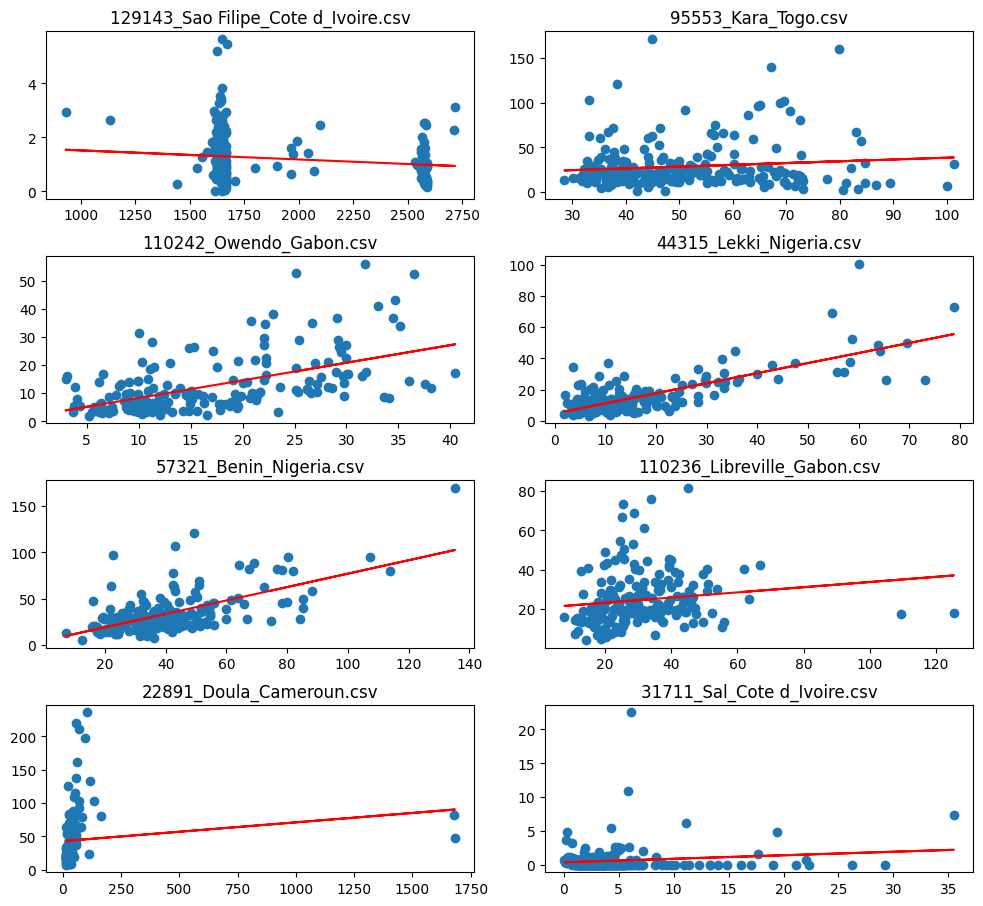

In [19]:
fl = glob.glob('*.csv')
fig, axes = plt.subplots(4,2, figsize=(10,9))
fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.0,wspace=0.0)
plt.tight_layout(h_pad=2,w_pad=2)
axf = axes.flatten()

for ii,i in enumerate(fl):
  df = pd.read_csv(i,na_values=-9999,index_col='time_stamp',usecols=['H', 'PM', 'AOD', 'PBLH','time_stamp'])
  df = df.dropna(how='any')

  aod = df['AOD'].values
  h = df['PBLH'].values
  rh = df['H'].values

  df = df.dropna()

  # initial guesses for a,b,c:
  p0 = 0.6, 0.5,
  K,gam,parr = fit_exp_nonlinear(df['PM'],df[['AOD','PBLH','H']])
  print([i,K,gam])

  jh = model_func(df[['AOD','PBLH','H']],K,gam)
  axf[ii].plot(df['PM'],jh,'o')
  v = sp.stats.linregress(df['PM'],jh)
  axf[ii].plot(df['PM'],v.slope*df['PM']+v.intercept,'r')
  axf[ii].set_title(i)
  print(v)


In [ ]:
import numpy as np
from scipy.optimize import curve_fit

def func(X, kk, gam):
    aod,h,rh = X
    rh=rh/100
    return  (aod/h)/(kk*((1-rh)/(1-0.4))**(-gam))

aod = df['AOD'].values
h = df['PBLH'].values
rh = df['H'].values

df = df.dropna()

# initial guesses for a,b,c:
p0 = 2.6, 0.5,
print(curve_fit(func, (aod,h,rh), df['PM'].values,nan_policy='omit'))

(array([2.85832827e-05, 5.36212056e-01]), array([[ 1.67967736e-12, -1.28751298e-07],
       [-1.28751298e-07,  2.12437772e-02]]))


In [ ]:
K,gam,parr = fit_exp_nonlinear(df['PM'],df[['AOD','PBLH','H']])
print([K,gam,parr])

[0.02858331580764844, 0.5362065950071342, array([[ 1.67951243e-06, -1.28739579e-04],
       [-1.28739579e-04,  2.12431329e-02]])]


In [ ]:
jh = model_func(df[['AOD','PBLH','H']],K,gam)

LinregressResult(slope=0.7232665100875212, intercept=4.765110243465568, rvalue=0.6175849269996135, pvalue=1.5934649833778248e-22, stderr=0.06529443625967732, intercept_stderr=2.91858751674319)


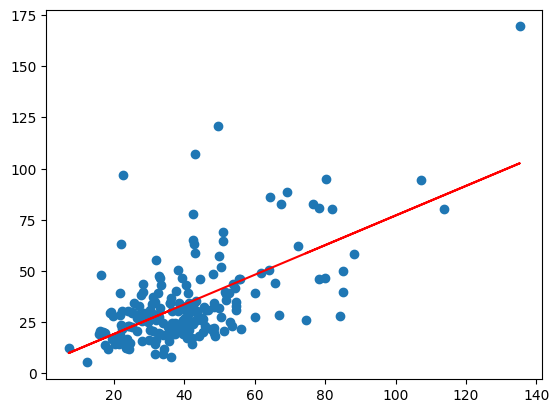

In [ ]:
plt.plot(df['PM'],jh,'o')
v = sp.stats.linregress(df['PM'],jh)
plt.plot(df['PM'],v.slope*df['PM']+v.intercept,'r')
print(v)

In [ ]:
#Import modeule
from bayesframe import BayesFrame
from bayesframe import load_data
from bayesframe import load_test_data


#df['Target'] = pm
#Initialize the model
bframe = BayesFrame(df=df, target='PM', val_scheme=None,
                    bic_scheme="per_n", model_scheme=["selection"])

#Print the best model
print(bframe.zoo)

{'H_AOD': {'slope': array([-1.56494068, 15.24453609]), 'intercept': 121.21146694173359, 'rmse': 10.992628461439928, 'n_dp': 201, 'BIC': 0.07915401859291278, 'Delta_BIC': 0.0}}


In [ ]:
#Import modeule
from bayesframe import BayesFrame
from bayesframe import load_data
from bayesframe import load_test_data

#Load the data
#data = load_data()
#df['Target'] = pm
#Initialize the model
bframe = BayesFrame(df=df, target='PM', val_scheme=None,
                    bic_scheme="per_n", model_scheme=["averaging", "all"])

#Print the best model
print(bframe.zoo)

{'H': {'slope': array([-1.95579696]), 'intercept': 151.91834434569762, 'rmse': 12.002509569965964, 'n_dp': 201, 'BIC': 0.2285511179973007, 'Delta_BIC': 0.14939709940438795}, 'AOD': {'slope': array([30.7779126]), 'intercept': 23.570729071993625, 'rmse': 14.682610254201554, 'n_dp': 201, 'BIC': 0.6316472357133486, 'Delta_BIC': 0.5524932171204358}, 'PBLH': {'slope': array([0.04823824]), 'intercept': 17.303726781673483, 'rmse': 17.315089286497876, 'n_dp': 201, 'BIC': 0.9614762693684988, 'Delta_BIC': 0.882322250775586}, 'H_AOD': {'slope': array([-1.56494068, 15.24453609]), 'intercept': 121.21146694173359, 'rmse': 10.992628461439928, 'n_dp': 201, 'BIC': 0.07915401859291278, 'Delta_BIC': 0.0}, 'H_PBLH': {'slope': array([-1.87195121,  0.01235967]), 'intercept': 141.15850081446268, 'rmse': 11.900393361529328, 'n_dp': 201, 'BIC': 0.23784711234626474, 'Delta_BIC': 0.15869309375335194}, 'AOD_PBLH': {'slope': array([2.84437571e+01, 1.42598640e-02]), 'intercept': 17.95637800470247, 'rmse': 14.5799393